Importing all necessary packages.

In [1]:
import nltk
import string
from nltk import word_tokenize, FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functions import *
%matplotlib inline

Importing data.

In [2]:
data = pd.read_csv('data.csv')

Preview top 5 data points.

In [3]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


Checking how many NaN values are present in each column.

In [4]:
data.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

Checking data types of each column.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


Creating a new data frame with input and output values only.

In [6]:
data_clean = pd.DataFrame({'text':data.text,'target':data.target})

Separating data by target variable.

In [7]:
data_disaster = data_clean.loc[data.target == 1]
data_not_disaster = data_clean.loc[data.target == 0]

Visualizing how many inputs each target value has.

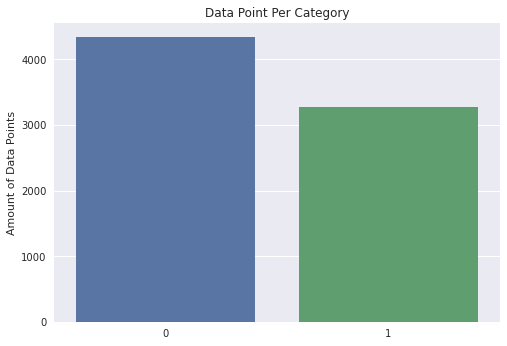

In [8]:
with plt.style.context('seaborn'):
    sns.barplot([0,1],[data_not_disaster.count()[0],data_disaster.count()[0]])
    plt.title('Data Point Per Category')
    plt.ylabel('Amount of Data Points')

Tokenizing all tweets while keeping the groups separated.

In [9]:
tokenize_disaster_text = [word_tokenize(i) for i in data_disaster.text]
tokenize_not_disaster_text = [word_tokenize(i) for i in data_not_disaster.text]

Cleaning tokens of all tweets.

In [11]:
clean_token_disaster_text = cleanToken(tokenize_disaster_text,['http','https'])
clean_token_not_disaster_text = cleanToken(tokenize_not_disaster_text,['http','https'])

Lemmatizing each word in each tweet.

In [12]:
lem_clean_disaster_text = [wml.lemmatize(word) for tweet in clean_token_disaster_text for word in tweet]
lem_clean_not_disaster_text = [wml.lemmatize(word) for tweet in clean_token_not_disaster_text for word in tweet]

Getting frequency distribution for both groups.

In [13]:
counted_disaster_text = FreqDist(lem_clean_disaster_text)
counted_not_disaster_text = FreqDist(lem_clean_not_disaster_text)

Sorting both distributions in descending order.

In [14]:
sorted_counted_disaster_text = {k:v for k,v in sorted(counted_disaster_text.items(), key=lambda item: item[1],reverse= True)}
sorted_counted_not_disaster_text = {k:v for k,v in sorted(counted_not_disaster_text.items(), key=lambda item: item[1],reverse= True)}

Visualizing most frequent words on both groups of tweets.

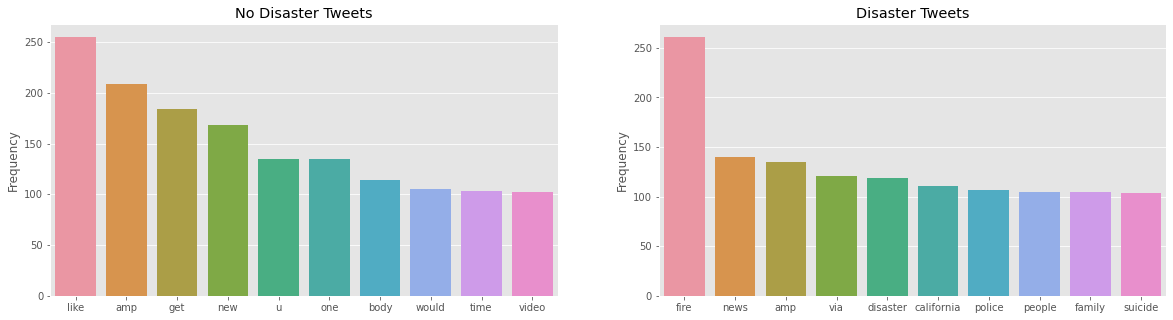

In [21]:
with plt.style.context('ggplot'):
    orderedData = [sorted_counted_not_disaster_text,sorted_counted_disaster_text]
    titles = ['No Disaster Tweets','Disaster Tweets']
    i = 0
    fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(20,5))
    for col in ax:
        x = list(orderedData[i].keys())[:10]
        y = list(orderedData[i].values())[:10]
        sns.barplot(x,y,ax=col)
        col.set_ylabel('Frequency')
        col.set_title(titles[i])
        i += 1

Importing algorithms and NLP preparations.

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier as xgbc
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV as grid
vectorizer = TfidfVectorizer()

Lemmatizing tweets and keeping tweets together.

In [39]:
model_disaster_tweet = lemmatize_tweets(clean_token_disaster_text)
model_not_disaster_tweet = lemmatize_tweets(clean_token_not_disaster_text)

In [44]:
df_disaster_tweet = pd.DataFrame({'tweets':model_disaster_tweet,'class':1})
df_non_disaster_tweet = pd.DataFrame({'tweets':model_not_disaster_tweet,'class':0})
model_df_tweet = pd.concat([df_disaster_tweet,df_non_disaster_tweet])

Separating data frame by input and output variable.

In [50]:
model_tweet = model_df_tweet.tweets
model_target = model_df_tweet['class']

Vectorizing tweets.

In [53]:
vectorized_tweets = vectorizer.fit_transform(model_tweet)

Splitting into train and test set.

In [57]:
X_train, X_test, y_train, y_test = train_test_split(vectorized_tweets,model_target)

Creating collection of algorithms.

In [61]:
algos = {'Logistic Regression':LogisticRegression(),'Nearest Neighbor':KNeighborsClassifier(),'Naive Bayes':MultinomialNB(),
        'Decision Tree':DecisionTreeClassifier(),'Random Forest':RandomForestClassifier(),'ADA Boost':AdaBoostClassifier(),
        'Gradient Boost':GradientBoostingClassifier(),'SVC':SVC(),'xgbc':xgbc()}

Comparing algorithms for best performing one.

In [68]:
model_comparison = ModelCompare(algos,X_train,y_train,X_test,y_test)

In [84]:
model_comparison

,Models,Training Accuracy,Test Accuracy,F1 Test
0,Logistic Regression,0.887896,0.800945,0.732155
1,Nearest Neighbor,0.878613,0.707458,0.695462
2,Naive Bayes,0.899982,0.803571,0.743484
3,Decision Tree,0.986513,0.717437,0.678230
4,Random Forest,0.986337,0.772059,0.714474
5,ADA Boost,0.767385,0.747899,0.665738
6,Gradient Boost,0.767910,0.728466,0.590657
7,SVC,0.966894,0.788866,0.707849
8,xgbc,0.867402,0.774160,0.703039
